# Basic EDA

Number of samples in training data: 220025
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

Class distribution:
label
0    130908
1     89117
Name: count, dtype: int64


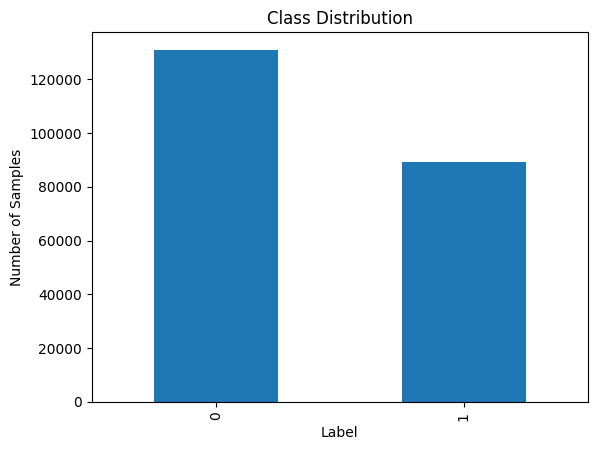

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_path = '/kaggle/input/histopathologic-cancer-detection'

train_labels_df = pd.read_csv(os.path.join(data_path, 'train_labels.csv'))

print(f'Number of samples in training data: {len(train_labels_df)}')

print(train_labels_df.head())

print("\nClass distribution:")
print(train_labels_df['label'].value_counts())

# Class distribution visualization
train_labels_df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.show()

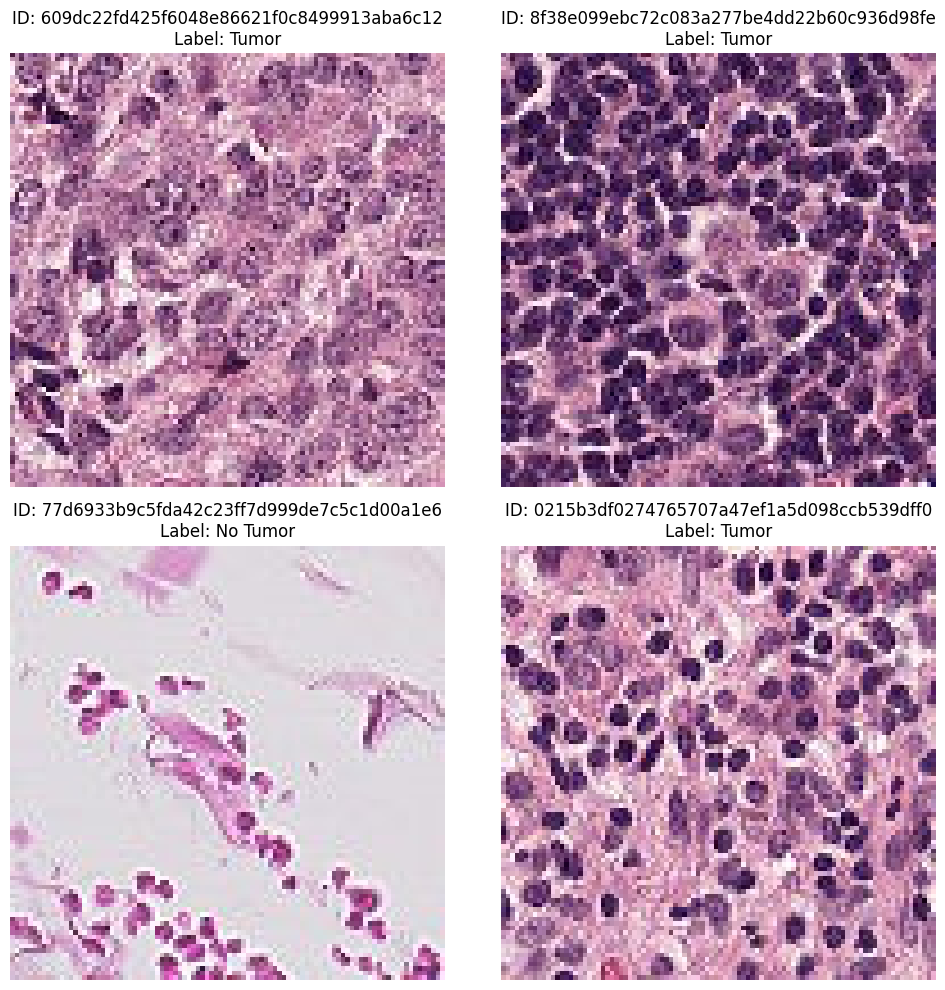

In [9]:
import random
from PIL import Image

train_images_dir = os.path.join(data_path, 'train')

random_image_ids = random.sample(train_labels_df['id'].tolist(), 4)

plt.figure(figsize=(10, 10))

for i, image_id in enumerate(random_image_ids):
    image_path = os.path.join(train_images_dir, f'{image_id}.tif')

    try:
        img = Image.open(image_path)

        label = train_labels_df[train_labels_df['id'] == image_id]['label'].iloc[0]
        label_text = 'Tumor' if label == 1 else 'No Tumor'

        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(f'ID: {image_id}\nLabel: {label_text}')
        plt.axis('off')

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing image {image_id}: {e}")

plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_df, val_df = train_test_split(train_labels_df, test_size=0.2, random_state=42, stratify=train_labels_df['label'])

# Check the size of the training and validation sets
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")

# Check the label distribution in the training and validation sets (optional, but good practice)
print("\nTraining set label distribution:")
print(train_df['label'].value_counts(normalize=True))
print("\nValidation set label distribution:")
print(val_df['label'].value_counts(normalize=True))


Training set size: 176020
Validation set size: 44005

Training set label distribution:
label
0    0.594966
1    0.405034
Name: proportion, dtype: float64

Validation set label distribution:
label
0    0.594978
1    0.405022
Name: proportion, dtype: float64


In [ ]:
import tensorflow as tf

# --- Configuration ---
IMG_SIZE = 96 # The images are 96x96 pixels
BATCH_SIZE = 64 # Process images in batches of 64